In [1]:
import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import layers,models,optimizers
from keras import backend as K
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [2]:
#tworzenie tensora straty
model=VGG16(weights='imagenet',include_top=False)
layer_name='block3_conv1'
filter_index=0

layer_output=model.get_layer(layer_name).output
loss=K.mean(layer_output[:,:,:,filter_index])

In [3]:
grads=K.gradients(loss,model.input)[0]
grads/=(K.sqrt(K.mean(grads))+1e-5)


In [4]:
iterate=K.function([model.input],[loss,grads])
loss_value,grads_value=iterate([np.zeros((1,150,150,3))])

In [5]:
input_img_data=np.random.random((1,150,150,3))*20+128.
step=1
for i in range (40):
    loss_value,grads_value=iterate([input_img_data])
    input_img_data+=grads_value*step

In [6]:
#przetwarzanie na obraz
def deprocess_image(x):
    x-=x.mean()
    x/=(x.std()+1e-5)
    x*=0.1

    x+=0.5
    x=np.clip(x,0,1)
    x*=255
    x=np.clip(x,0,255).astype('uint8')
    return x

In [7]:
def generate_pattern(layer_name,filter_index,size=150):
    layer_output=model.get_layer(layer_name).output
    loss=K.mean(layer_output[:,:,:,filter_index])

    grads=K.gradients(loss,model.input)[0]

    grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)

    iterate=K.function([model.input],[loss,grads])
    input_img_data=np.random.random((1,size,size,3))*20+128

    step=1
    for i in range(40):
        loss_value,grads_value=iterate([input_img_data])
        input_img_data+=grads_value*step

        img=input_img_data[0]
        return deprocess_image(img)

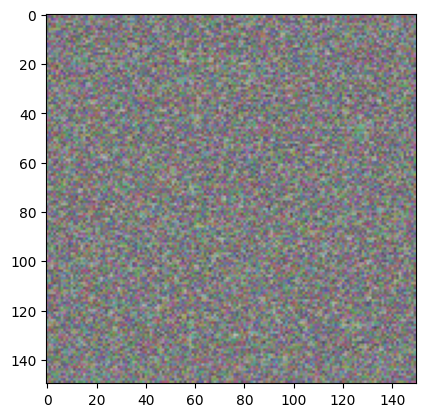

In [8]:
plt.imshow(generate_pattern('block3_conv1',0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


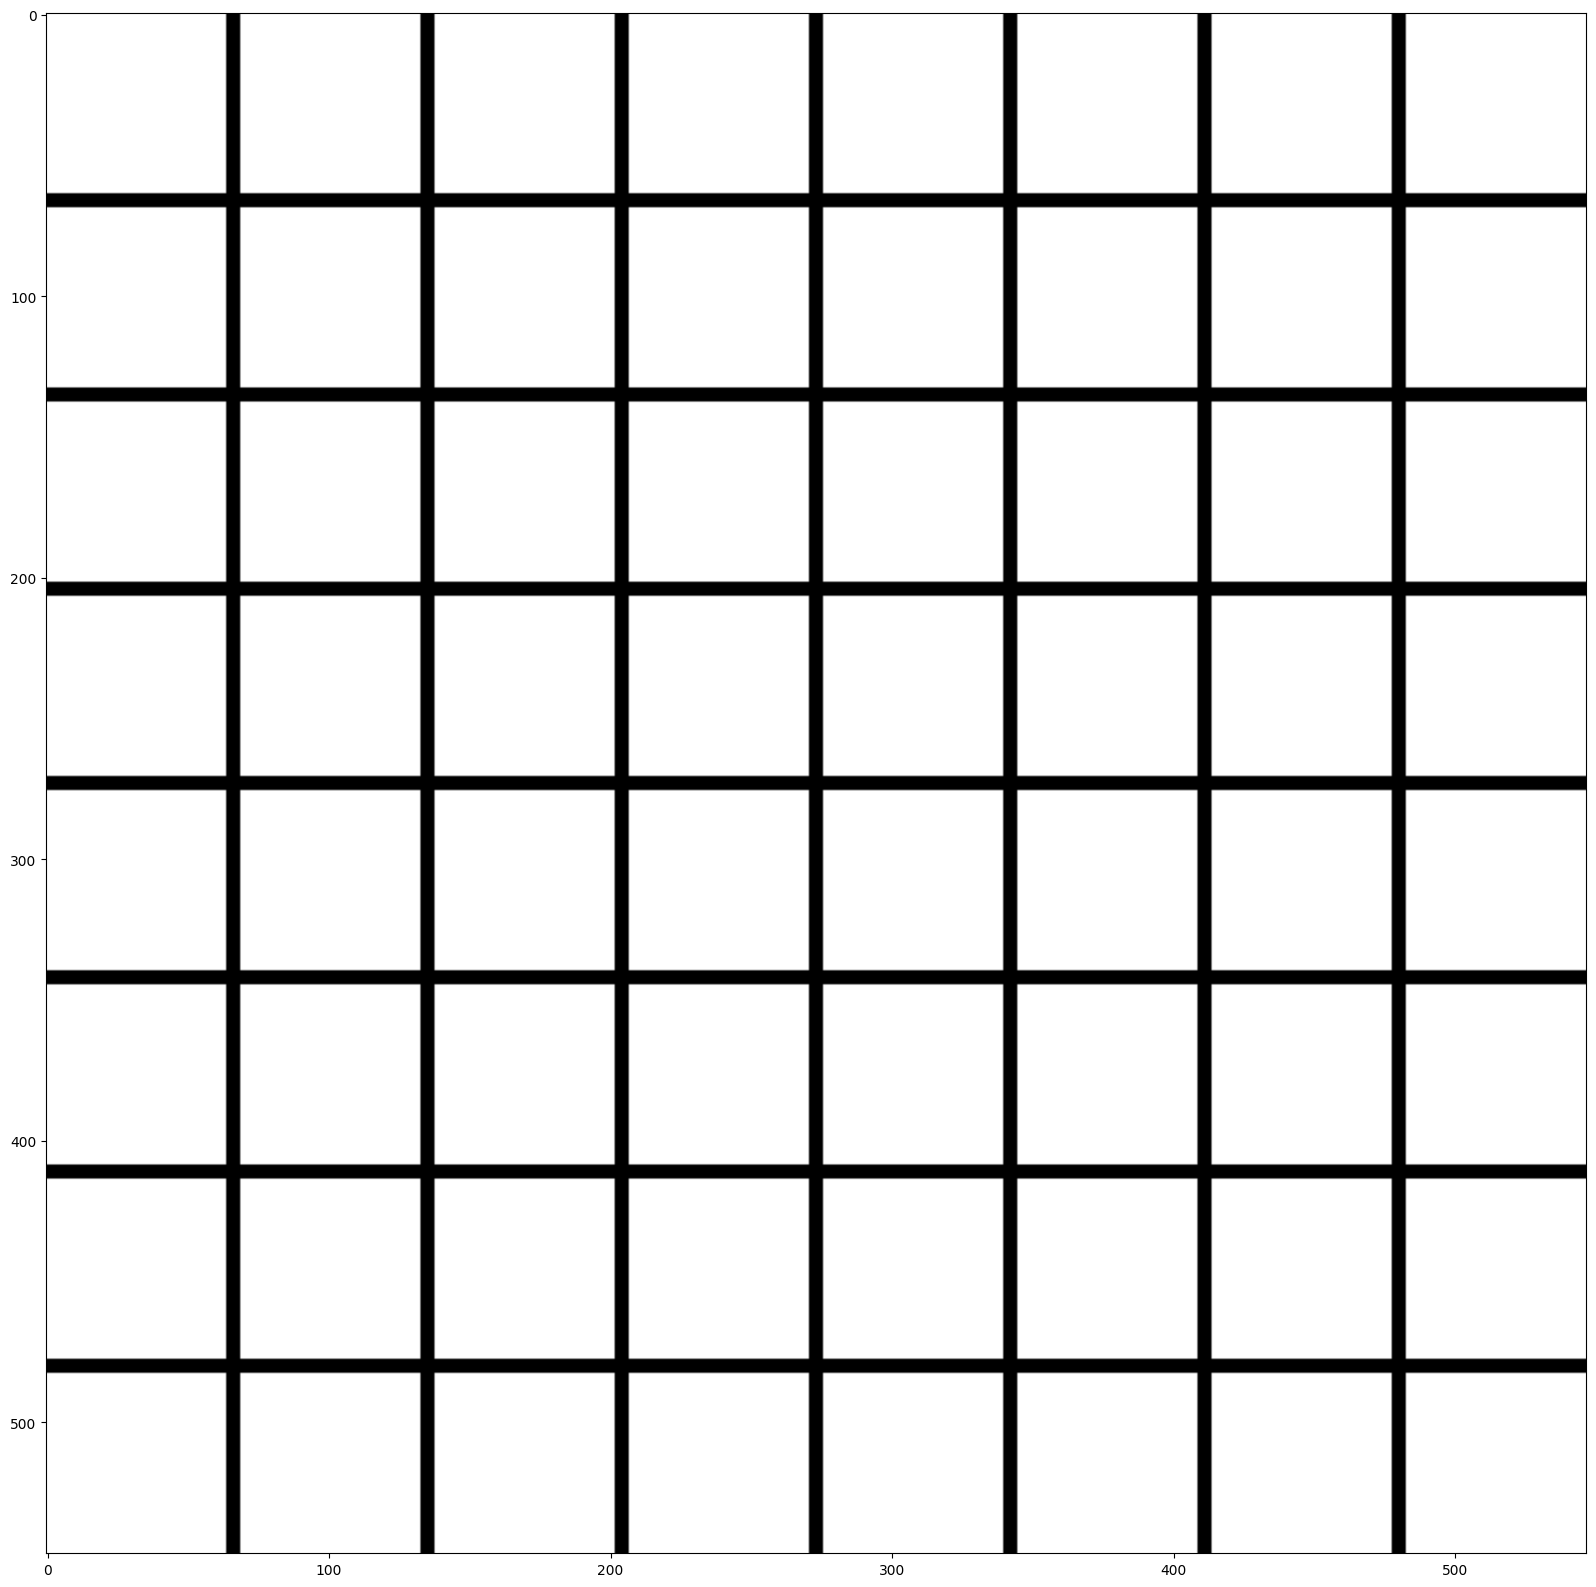

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


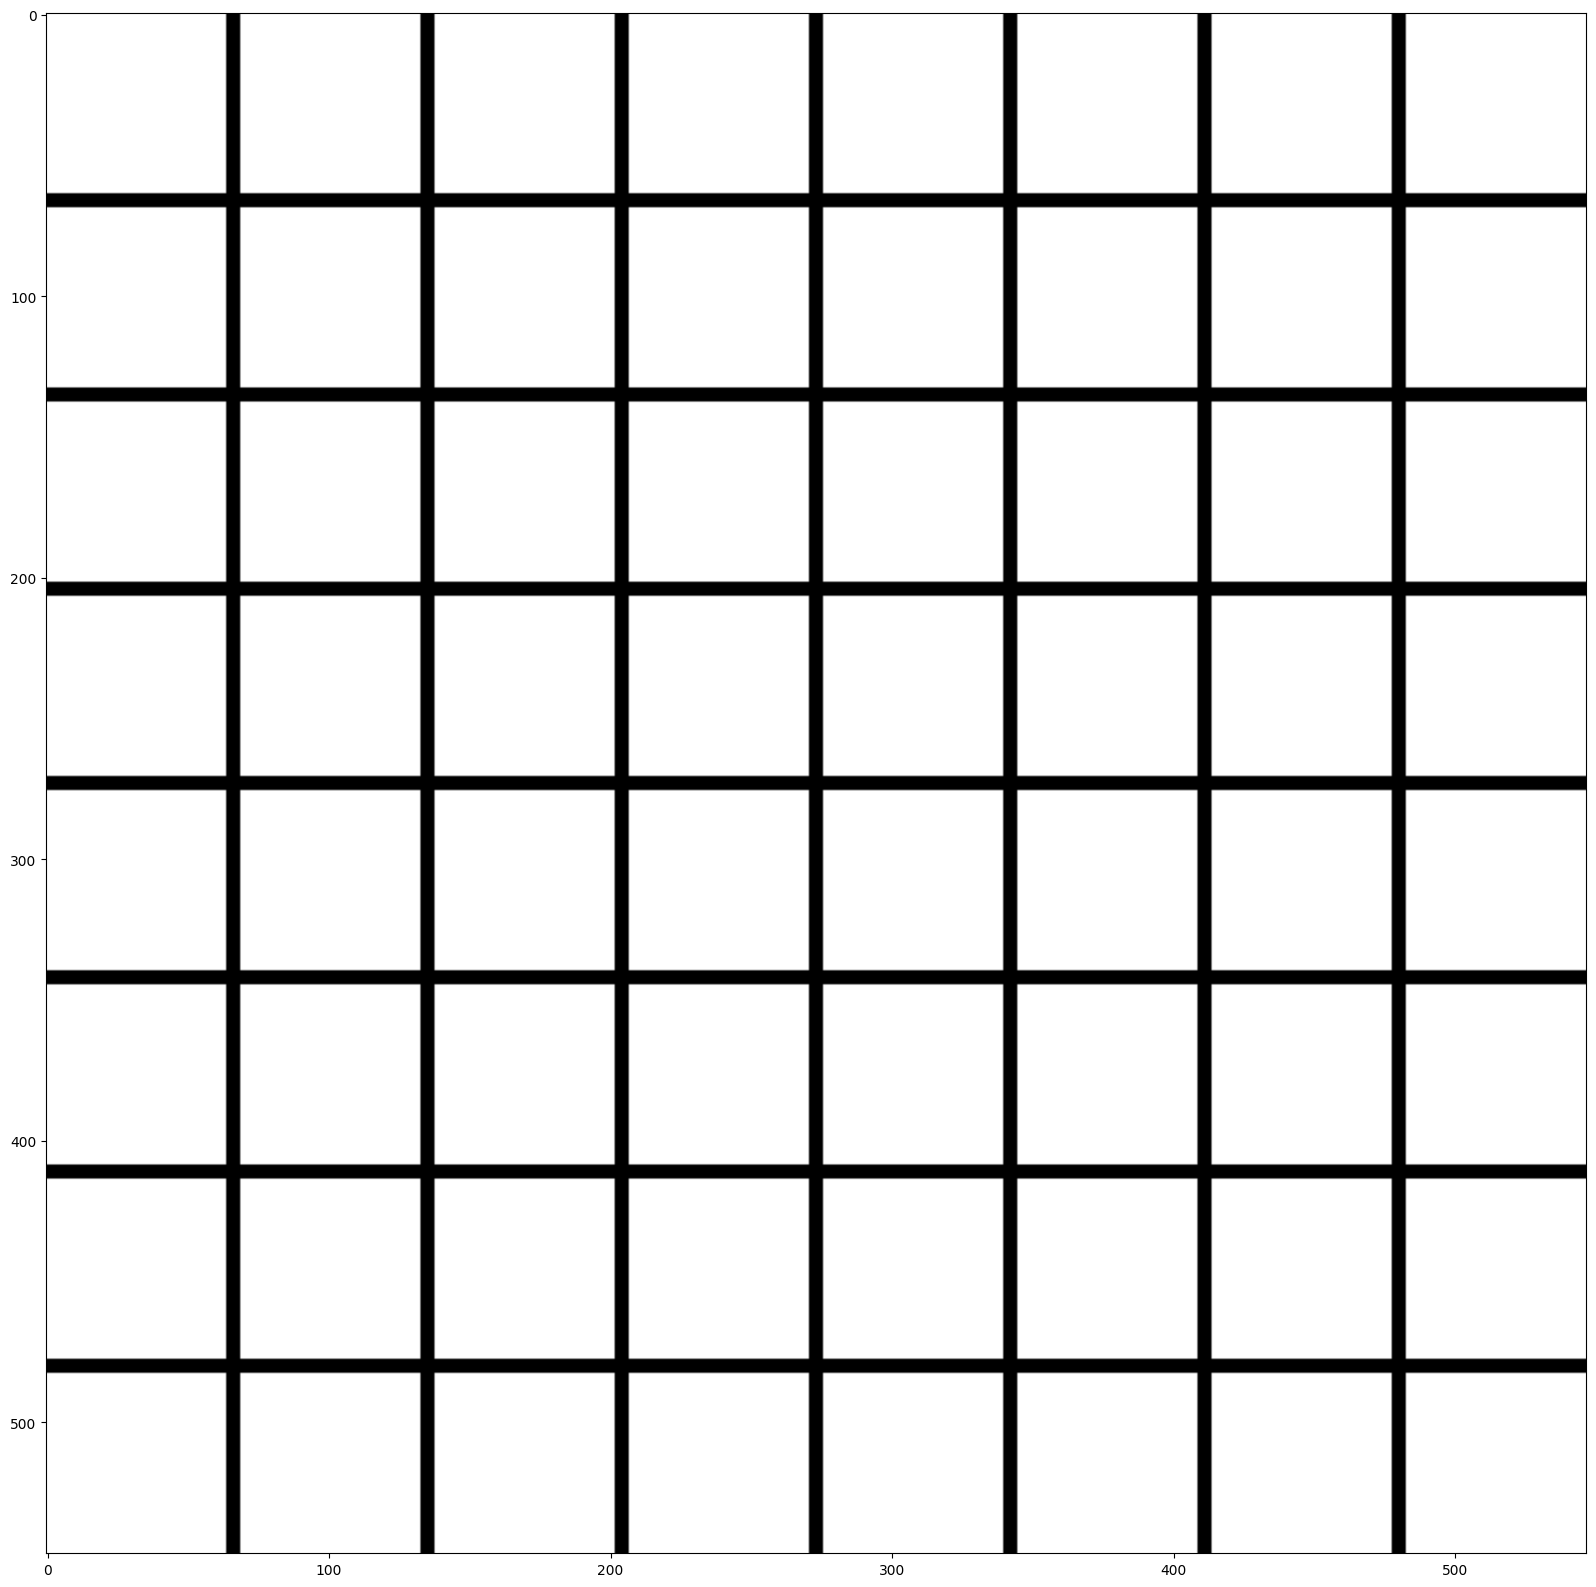

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


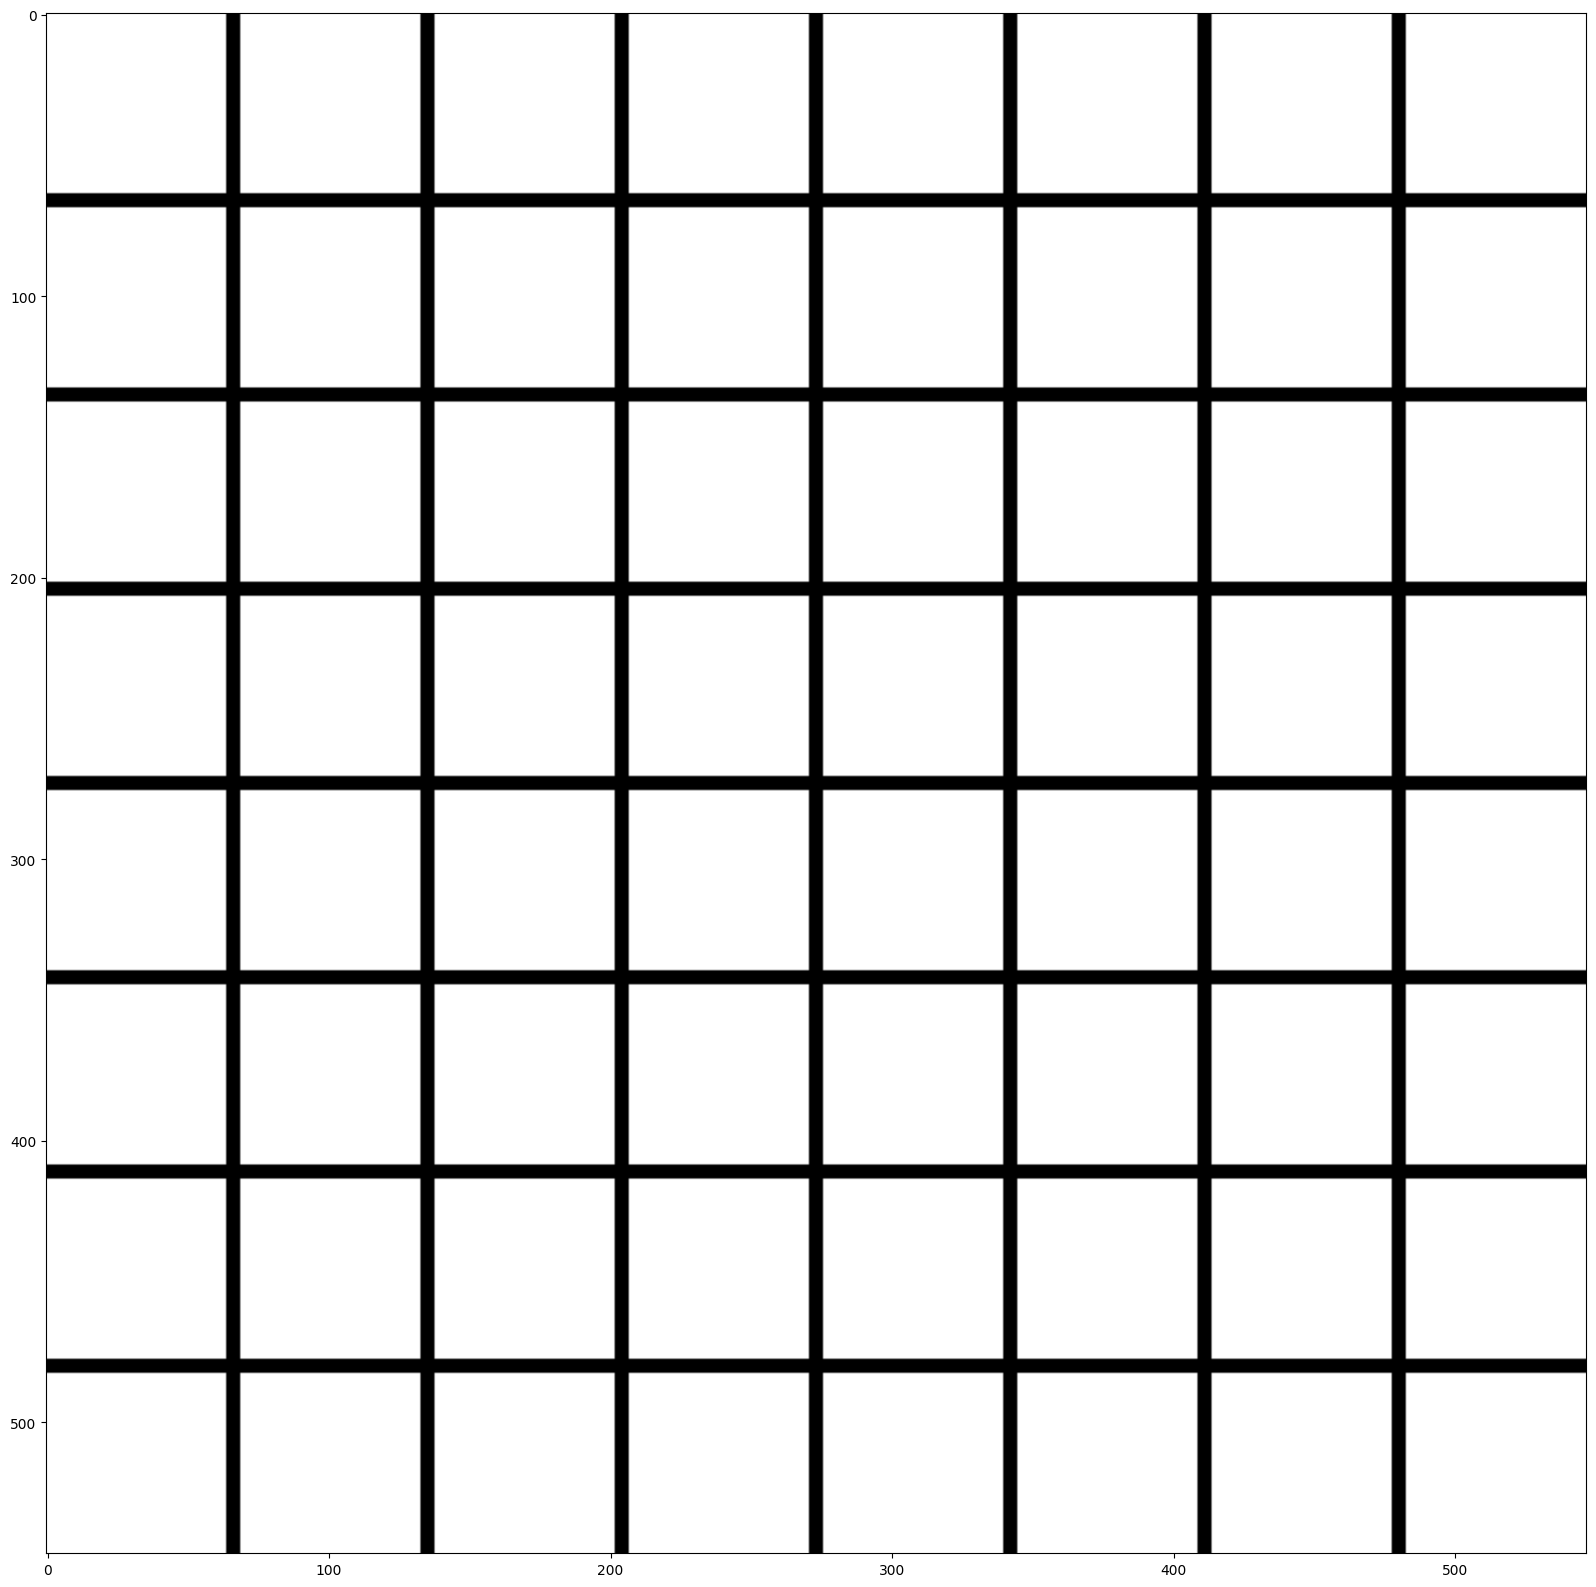

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


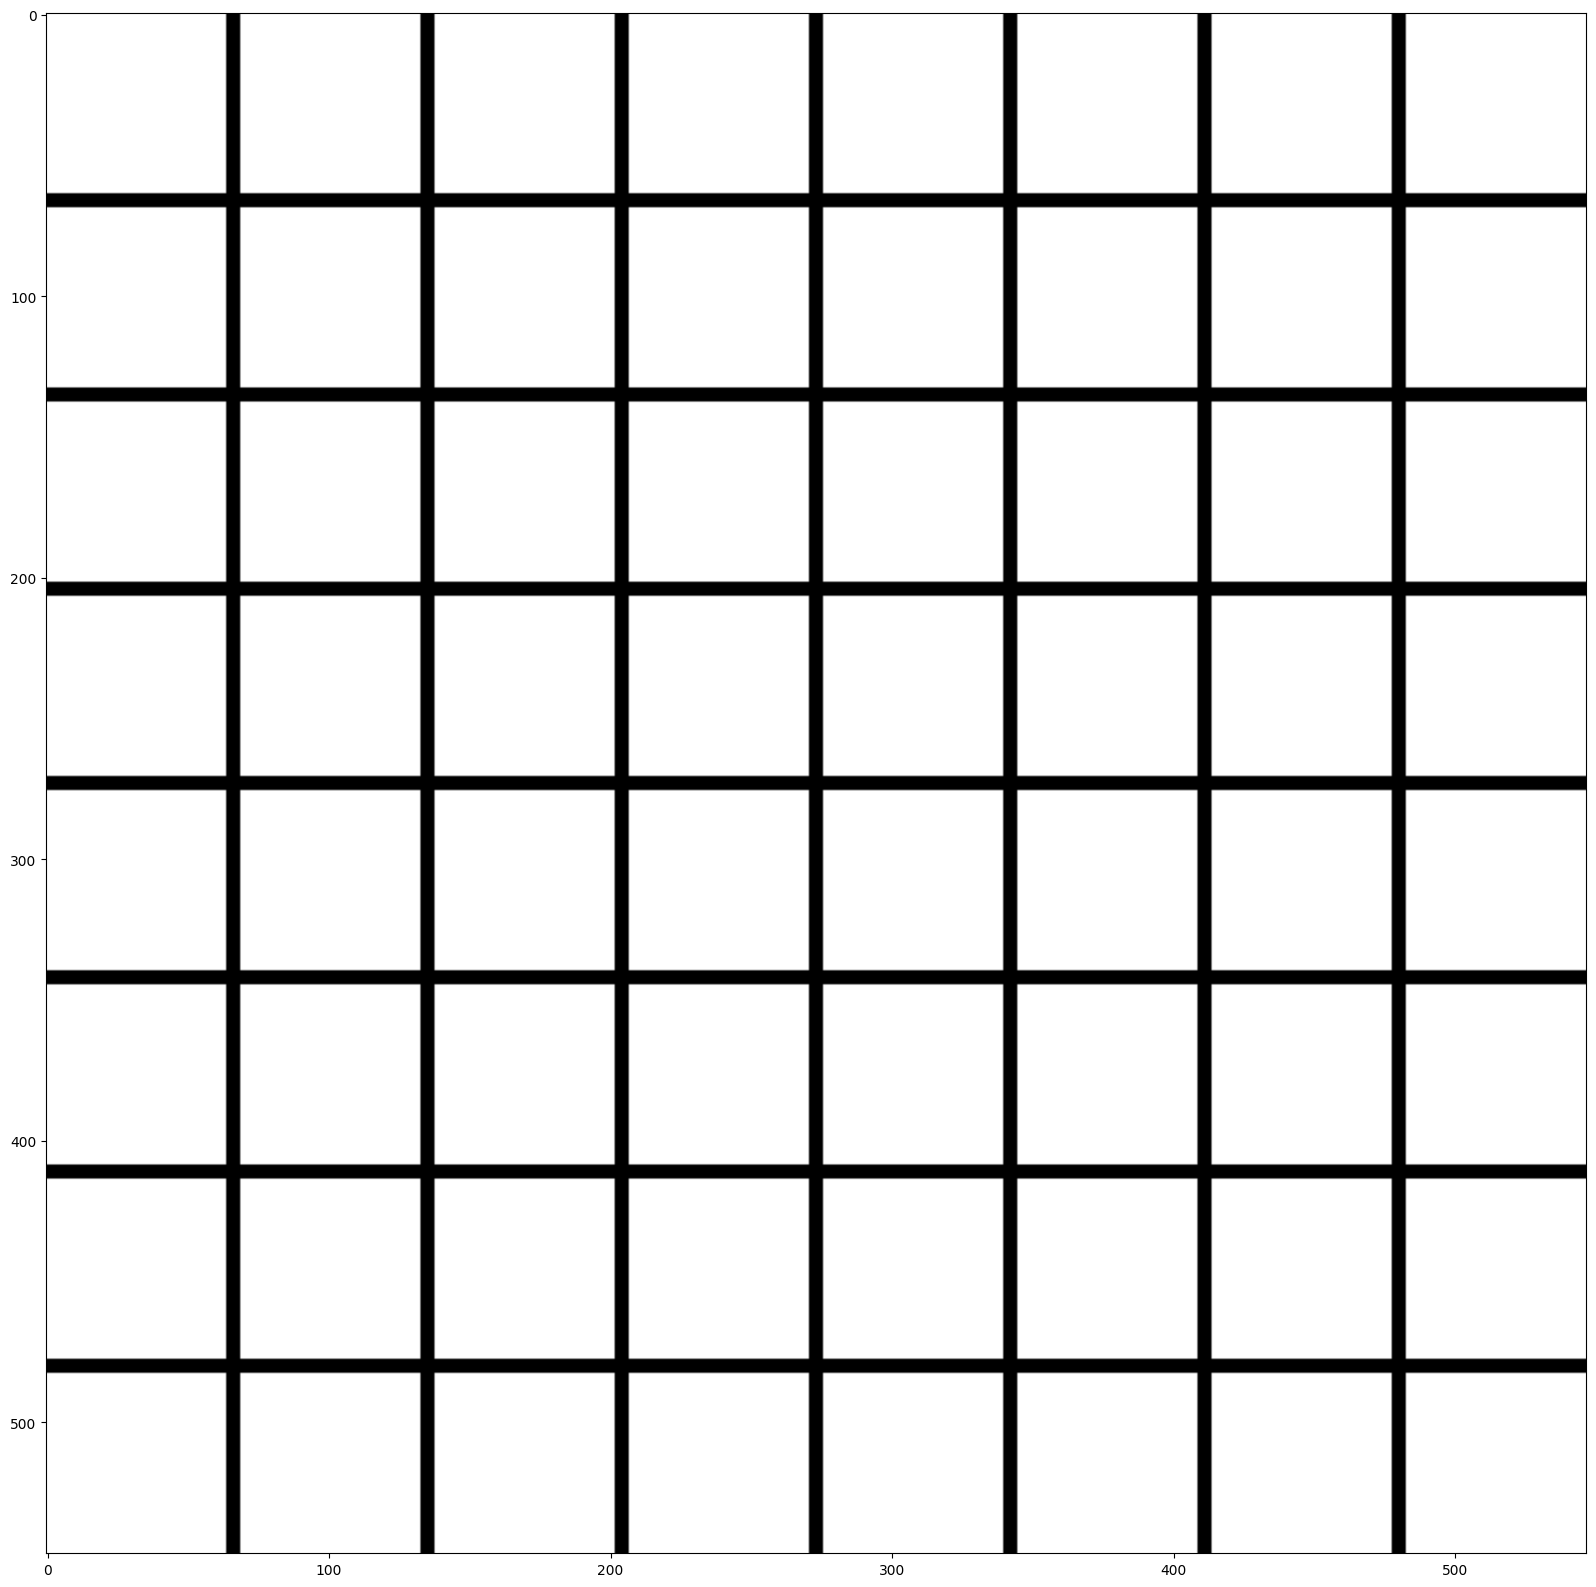

In [10]:
# siatka wzorców 
for layer_name in ['block1_conv1','block2_conv1','block3_conv1','block4_conv1']:
    size=64
    margin=5

    results=np.zeros((8*size+7*margin,8*size+7*margin,3))
    for i in range(8):
        for j in range(8):
            filter_img=generate_pattern(layer_name,i+(j*8),size=size)

            horizontal_start=i*size+i*margin
            horizontal_end=horizontal_start+size

            vertical_start=j*size+j*margin
            vertical_end=vertical_start+size

            results[horizontal_start:horizontal_end,vertical_start:vertical_end,:]=filter_img
    plt.figure(figsize=(20,20))
    plt.imshow(results)
    plt.show()